# Sugeno Fuzzy Inference System


In [1]:
import numpy as np
import FuzzySystem as fs

### Inputs

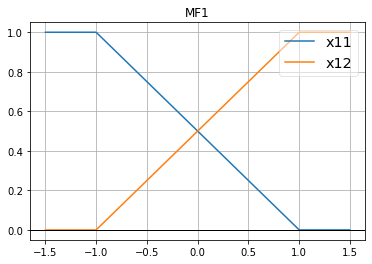

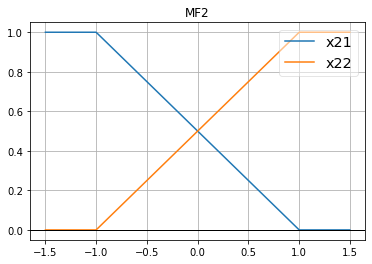

In [2]:
#INPUTS
x11 = fs.FuzzySet('x11', fs.Trapmf([-1.5,-1.5,-1,1]))
x12 = fs.FuzzySet('x12', fs.Trapmf([-1,1,1.5,1.5]))
mf1 = fs.FuzzyVariable('MF1',[x11, x12], universe=[-1.5, 1.5])
mf1.show()

x21 = fs.FuzzySet('x21', fs.Trapmf([-1.5,-1.5,-1,1]))
x22 = fs.FuzzySet('x22', fs.Trapmf([-1,1,1.5,1.5]))
mf2 = fs.FuzzyVariable('MF2',[x21, x22], universe=[-1.5, 1.5])
mf2.show()

### Sugeno consequents

In [3]:
#OUTPUT
output1 = fs.TSKConsequent(function='linear')

def f1(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output2 = fs.TSKConsequent(params=np.array([2,2.5,2.5]), function=f1)

output3 = fs.TSKConsequent(params=8, function='constant')

def f2(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output4 = fs.TSKConsequent(params=np.array([4,4.5,3.5]), function=f2)

### Rules

In [4]:
ant1  = fs.Antecedent(mf1['x11'] & mf2['x21'])
rule1 = fs.FuzzyRule(ant1, output1)

ant2  = fs.Antecedent(mf1['x11'] & mf2['x22'])
rule2 = fs.FuzzyRule(ant2, output2)

ant3  = fs.Antecedent(mf1['x12'] & mf2['x21'])
rule3 = fs.FuzzyRule(ant3, output3)

ant4  = fs.Antecedent(mf1['x12'] & mf2['x22'])
rule4 = fs.FuzzyRule(ant4, output4)

#Building the FIS

fis = fs.FuzzyInferenceSystem([rule1, rule2, rule3, rule4], and_op='prod', or_op='sum')

### FIS Evaluation

In [5]:

#FIS Evaluation

inputs = ({'MF1':-1.5, 'MF2':1.5})
result = fis.eval(inputs, verbose=True)
fs.TSKDefuzzifier(result).eval()

Inputs:
MF1: -1.5
MF2: 1.5
 IF MF1 is x11 and MF2 is x21 THEN linear_function, fs = [0] with weight = 1.00
 IF MF1 is x11 and MF2 is x22 THEN f1, fs = [1] with weight = 1.00
 IF MF1 is x12 and MF2 is x21 THEN constant_function, fs = [0] with weight = 1.00
 IF MF1 is x12 and MF2 is x22 THEN f2, fs = [0] with weight = 1.00


2.0

In [6]:
inputs = ({'MF1':[-1.5, -4], 'MF2':[1.5, 5]})
result = fis.eval(inputs, verbose=True)
fs.TSKDefuzzifier(result).eval()

Inputs:
MF1: [-1.5, -4]
MF2: [1.5, 5]
 IF MF1 is x11 and MF2 is x21 THEN linear_function, fs = [[0 0]] with weight = 1.00
 IF MF1 is x11 and MF2 is x22 THEN f1, fs = [[1 1]] with weight = 1.00
 IF MF1 is x12 and MF2 is x21 THEN constant_function, fs = [[0 0]] with weight = 1.00
 IF MF1 is x12 and MF2 is x22 THEN f2, fs = [[0 0]] with weight = 1.00


array([2. , 4.5])